In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.display.max_columns=150
pd.options.display.max_rows=999

In [2]:
os.getcwd()

'C:\\Users\\DURJAY\\Desktop\\class material\\Term-2\\fina'

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
       
        1. Iterate over every column
        2. Determine if the column is numeric
        3. Determine if the column can be represented by an integer
        4. Find the min and the max value
        5. Determine and apply the smallest datatype that can fit the range of values

    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df


In [4]:
#train = import_data('application_train.csv')
test = import_data('application_test.csv')
bureau = import_data('bureau.csv')
bureau_balance = import_data('bureau_balance.csv')
previous_application = import_data('previous_application.csv')
credit_card_balance = import_data('credit_card_balance.csv')
installments_payments = import_data('installments_payments.csv')
POS_CASH_balance = import_data('POS_CASH_balance.csv')

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 9.40 MB
Decreased by 79.1%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 78.57 MB
Decreased by 64.7%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 156.21 MB
Decreased by 75.0%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 130.62 MB
Decreased by 72.3%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 263.69 MB
Decreased by 60.9%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 171.69 MB
Decreased by 71.9%


In [5]:
train = pd.read_csv('application_train.csv')

In [6]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

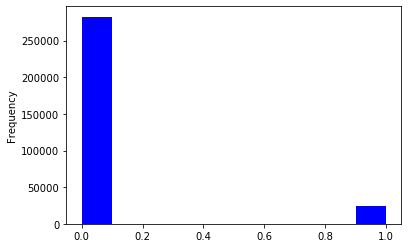

In [7]:
train.TARGET.plot.hist(color = 'b')

In [8]:
sum(train.isna().sum())/(train.shape[0]*train.shape[1])*100

24.39594190712943

In [9]:
train_NA = (np.round((train.isna().sum()/len(train)),3)).sort_values(ascending = False)*100
train_NA = train_NA.sort_values(ascending = False)
train_NA.head(10)

COMMONAREA_MEDI             69.9
COMMONAREA_AVG              69.9
COMMONAREA_MODE             69.9
NONLIVINGAPARTMENTS_MODE    69.4
NONLIVINGAPARTMENTS_MEDI    69.4
NONLIVINGAPARTMENTS_AVG     69.4
LIVINGAPARTMENTS_MEDI       68.4
LIVINGAPARTMENTS_MODE       68.4
FONDKAPREMONT_MODE          68.4
LIVINGAPARTMENTS_AVG        68.4
dtype: float64

In [10]:
# what about subcategories within categorical data
train.select_dtypes('category').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [11]:
train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Dealing with missing values

In [12]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [13]:
POS_CASH_balance_clean = POS_CASH_balance.dropna(how = 'any',axis = 0)
POS_CASH_balance_clean.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [14]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [15]:
installments_payments.DAYS_ENTRY_PAYMENT[installments_payments.DAYS_ENTRY_PAYMENT.isnull()] = installments_payments.DAYS_ENTRY_PAYMENT.median()

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
installments_payments.AMT_PAYMENT[installments_payments.AMT_PAYMENT.isnull()] = installments_payments.AMT_PAYMENT.median()

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
credit_card_balance.AMT_DRAWINGS_ATM_CURRENT[credit_card_balance.AMT_DRAWINGS_ATM_CURRENT.isnull()] = credit_card_balance.AMT_DRAWINGS_ATM_CURRENT.median()
credit_card_balance.AMT_DRAWINGS_OTHER_CURRENT[credit_card_balance.AMT_DRAWINGS_OTHER_CURRENT.isnull()] = credit_card_balance.AMT_DRAWINGS_OTHER_CURRENT.median()
credit_card_balance.AMT_DRAWINGS_POS_CURRENT[credit_card_balance.AMT_DRAWINGS_POS_CURRENT.isnull()] = credit_card_balance.AMT_DRAWINGS_POS_CURRENT.median()
credit_card_balance.CNT_DRAWINGS_ATM_CURRENT[credit_card_balance.CNT_DRAWINGS_ATM_CURRENT.isnull()] = credit_card_balance.CNT_DRAWINGS_ATM_CURRENT.median()
credit_card_balance.CNT_DRAWINGS_OTHER_CURRENT[credit_card_balance.CNT_DRAWINGS_OTHER_CURRENT.isnull()] = credit_card_balance.CNT_DRAWINGS_OTHER_CURRENT.median()
credit_card_balance.CNT_DRAWINGS_POS_CURRENT[credit_card_balance.CNT_DRAWINGS_POS_CURRENT.isnull()] = credit_card_balance.CNT_DRAWINGS_POS_CURRENT.median()

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipyk

In [18]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT           0
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT         0
AMT_DRAWINGS_POS_CURRENT           0
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT           0
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT         0
CNT_DRAWINGS_POS_CURRENT           0
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [19]:
credit_card_balance.AMT_INST_MIN_REGULARITY[credit_card_balance.AMT_INST_MIN_REGULARITY.isnull()] = credit_card_balance.AMT_INST_MIN_REGULARITY.median()
credit_card_balance.CNT_INSTALMENT_MATURE_CUM[credit_card_balance.CNT_INSTALMENT_MATURE_CUM.isnull()] = credit_card_balance.CNT_INSTALMENT_MATURE_CUM.median()

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT           0
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT         0
AMT_DRAWINGS_POS_CURRENT           0
AMT_INST_MIN_REGULARITY            0
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT           0
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT         0
CNT_DRAWINGS_POS_CURRENT           0
CNT_INSTALMENT_MATURE_CUM          0
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [21]:
credit_card_balance=credit_card_balance.drop("AMT_PAYMENT_CURRENT",axis=1)

In [22]:
np.sum(pd.isnull(bureau))

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [23]:
bureau.drop(["AMT_ANNUITY"],axis=1,inplace = True)
bureau.drop(["AMT_CREDIT_MAX_OVERDUE"],axis=1,inplace = True)

In [24]:
bureau["AMT_CREDIT_SUM_LIMIT"].fillna(bureau["AMT_CREDIT_SUM_LIMIT"].median(),inplace = True)

In [25]:
bue_debt_active=bureau.loc[bureau["CREDIT_ACTIVE"]=="Active",]
# Need to impute 0 for closed loans and median for active loans
bue_debt_active["AMT_CREDIT_SUM_DEBT"].median()

97281.0

In [26]:
bureau.loc[(bureau["CREDIT_ACTIVE"]=="Active") & (pd.isnull(bureau["AMT_CREDIT_SUM_DEBT"])),"AMT_CREDIT_SUM_DEBT"]=bue_debt_active["AMT_CREDIT_SUM_DEBT"].median()

In [27]:
bue_debt_badDebt=bureau.loc[bureau["CREDIT_ACTIVE"]=="Bad debt",]

In [28]:
np.sum(pd.isnull(bue_debt_badDebt))

SK_ID_CURR                 0
SK_ID_BUREAU               0
CREDIT_ACTIVE              0
CREDIT_CURRENCY            0
DAYS_CREDIT                0
CREDIT_DAY_OVERDUE         0
DAYS_CREDIT_ENDDATE        1
DAYS_ENDDATE_FACT         11
CNT_CREDIT_PROLONG         0
AMT_CREDIT_SUM             0
AMT_CREDIT_SUM_DEBT        6
AMT_CREDIT_SUM_LIMIT       0
AMT_CREDIT_SUM_OVERDUE     0
CREDIT_TYPE                0
DAYS_CREDIT_UPDATE         0
dtype: int64

In [29]:
bureau.loc[(bureau["CREDIT_ACTIVE"]=="Bad debt") & (pd.isnull(bureau["AMT_CREDIT_SUM_DEBT"])),"AMT_CREDIT_SUM_DEBT"]=bue_debt_active["AMT_CREDIT_SUM_DEBT"].mean()

In [30]:
bue_debt_cosed=bureau.loc[bureau["CREDIT_ACTIVE"]=="Closed",]
bureau.loc[(bureau["CREDIT_ACTIVE"]=="Closed") & (pd.isnull(bureau["AMT_CREDIT_SUM_DEBT"])),"AMT_CREDIT_SUM_DEBT"]=bue_debt_active["AMT_CREDIT_SUM_DEBT"].median()

In [31]:
bue_debt_sold=bureau.loc[bureau["CREDIT_ACTIVE"]=="Sold",]
bureau.loc[(bureau["CREDIT_ACTIVE"]=="Sold") & (pd.isnull(bureau["AMT_CREDIT_SUM_DEBT"])),"AMT_CREDIT_SUM_DEBT"]=bue_debt_active["AMT_CREDIT_SUM_DEBT"].median()

In [32]:
bureau.loc[(pd.isnull(bureau["AMT_CREDIT_SUM"])),"AMT_CREDIT_SUM"]=bue_debt_active["AMT_CREDIT_SUM"].median()

In [33]:
bureau.drop("DAYS_ENDDATE_FACT",axis=1,inplace=True)

In [34]:
bureau.loc[(bureau["CREDIT_ACTIVE"]=="Active") & (pd.isnull(bureau["DAYS_CREDIT_ENDDATE"])),"DAYS_CREDIT_ENDDATE"]=bue_debt_active["DAYS_CREDIT_ENDDATE"].median()

bureau.loc[(bureau["CREDIT_ACTIVE"]=="Closed") & (pd.isnull(bureau["DAYS_CREDIT_ENDDATE"])),"DAYS_CREDIT_ENDDATE"]=bue_debt_active["DAYS_CREDIT_ENDDATE"].median()

bureau.loc[(bureau["CREDIT_ACTIVE"]=="Sold") & (pd.isnull(bureau["DAYS_CREDIT_ENDDATE"])),"DAYS_CREDIT_ENDDATE"]=bue_debt_active["DAYS_CREDIT_ENDDATE"].median()

bureau.loc[(bureau["CREDIT_ACTIVE"]=="Bad debt") & (pd.isnull(bureau["DAYS_CREDIT_ENDDATE"])),"DAYS_CREDIT_ENDDATE"]=bue_debt_active["DAYS_CREDIT_ENDDATE"].median()

In [35]:
np.sum(pd.isnull(bureau))

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

In [36]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

,SK_ID_CURR,PREVIOUS_LOANS_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [37]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [38]:
previous_application.AMT_ANNUITY[previous_application.AMT_ANNUITY.isnull()] = 0
previous_application.AMT_GOODS_PRICE[previous_application.AMT_GOODS_PRICE.isnull()] = 0
previous_application.DAYS_FIRST_DRAWING[previous_application.DAYS_FIRST_DRAWING.isnull()] = 0
previous_application.DAYS_FIRST_DUE[previous_application.DAYS_FIRST_DUE.isnull()] = 0
previous_application.DAYS_LAST_DUE[previous_application.DAYS_LAST_DUE.isnull()] = 0
previous_application.DAYS_LAST_DUE_1ST_VERSION[previous_application.DAYS_LAST_DUE_1ST_VERSION.isnull()] = 0
previous_application.DAYS_TERMINATION[previous_application.DAYS_TERMINATION.isnull()] = 0
previous_application.NFLAG_INSURED_ON_APPROVAL[previous_application.NFLAG_INSURED_ON_APPROVAL.isnull()] = 0
previous_application.AMT_DOWN_PAYMENT[previous_application.AMT_DOWN_PAYMENT.isnull()] = 0
previous_application.RATE_DOWN_PAYMENT[previous_application.RATE_DOWN_PAYMENT.isnull()] = 0
previous_application.CNT_PAYMENT[previous_application.CNT_PAYMENT.isnull()] = 0
previous_application.AMT_CREDIT[previous_application.AMT_CREDIT.isnull()] = 0

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipyk

In [39]:
#Dropping the variables with 99.6% missing values
previous_application.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
previous_application.drop(['NAME_TYPE_SUITE'], axis=1, inplace=True)

In [40]:
k=previous_application["PRODUCT_COMBINATION"].mode()
previous_application.loc[pd.isnull(previous_application['PRODUCT_COMBINATION']),'PRODUCT_COMBINATION'] = k[0]

In [41]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_

In [42]:
np.sum(pd.isnull(train))

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [43]:
train["AMT_ANNUITY"].fillna(train["AMT_ANNUITY"].median(),inplace=True)

train["AMT_GOODS_PRICE"].fillna(train["AMT_GOODS_PRICE"].median(),inplace=True)

train["NAME_TYPE_SUITE"].fillna(train["NAME_TYPE_SUITE"].mode()[0],inplace=True)

train.loc[(train["FLAG_OWN_CAR"]=='Y') & (pd.isnull(train["OWN_CAR_AGE"])),"OWN_CAR_AGE" ]=train["OWN_CAR_AGE"].median()

train.loc[(train["FLAG_OWN_CAR"]=='N') & (pd.isnull(train["OWN_CAR_AGE"])),"OWN_CAR_AGE" ]=0.0


all_cols=train.columns
num_cols=train._get_numeric_data().columns
categoriacal_cols=list(set(all_cols)-set(num_cols))
categoriacal_cols



nulls = train.isnull().sum()
percent_nulls = (nulls/train.isnull().count())*100
missing_values  = pd.concat([nulls, percent_nulls], axis=1, keys=['Total', 'Percent'])
missing_values
# Vignesh


#Imputing the AMT_REQ columns with median
amt_req = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in amt_req:
    train.loc[pd.isnull(train[i]),i] = train[i].median()


#Imputing the OBS_DEF columns with median
obs_def = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for i in obs_def:
    train.loc[pd.isnull(train[i]),i] = train[i].median()



train.loc[pd.isnull(train['DAYS_LAST_PHONE_CHANGE']),'DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE'].median()

train.loc[pd.isnull(train['EXT_SOURCE_2']),'EXT_SOURCE_2'] = train['EXT_SOURCE_2'].median()
train.loc[pd.isnull(train['EXT_SOURCE_3']),'EXT_SOURCE_3'] = train['EXT_SOURCE_3'].median()
train.loc[pd.isnull(train['CNT_FAM_MEMBERS']),'CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].median()

In [44]:
lst = train.columns
housing_columns = lst[44:91]


for i in range(len(housing_columns)):
    train[housing_columns[i]].fillna(0,inplace=True)



train.drop(["WALLSMATERIAL_MODE"],axis=1,inplace = True)

train.drop(["HOUSETYPE_MODE"],axis=1,inplace = True)

train.drop(["FONDKAPREMONT_MODE"],axis=1,inplace = True)
train.drop(["EXT_SOURCE_1"],axis=1,inplace = True)
# Need to re consider this columns


train.drop(["OCCUPATION_TYPE"],axis=1,inplace = True)
train.drop(["EMERGENCYSTATE_MODE"],axis=1,inplace = True)

In [45]:
train=reduce_mem_usage(train)

Memory usage of dataframe is 272.15 MB
Memory usage after optimization is: 57.49 MB
Decreased by 78.9%


In [46]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=116)

In [47]:
train_labels = train.loc[:,['TARGET','SK_ID_CURR']]

In [48]:
train, test = train.align(test, join = 'inner', axis = 1)

In [49]:
#data.shape

In [50]:
data = train.append(test)

In [51]:
data = data.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

In [52]:
# first define the formula for grouping rows by ID and calculating mean values
def extract_mean(x):
    y = x.groupby('SK_ID_BUREAU', as_index=False).mean().add_prefix('BUR_BAL_MEAN_') 
    return y

In [53]:
bureau_bal_mean = extract_mean(bureau_balance)

In [54]:
bureau_bal_mean = bureau_bal_mean.rename(columns = {'BUR_BAL_MEAN_SK_ID_BUREAU' : 'SK_ID_BUREAU'})

In [55]:
bureau = bureau.merge(bureau_bal_mean, on = 'SK_ID_BUREAU', how = 'left')
bureau.drop('SK_ID_BUREAU', axis = 1, inplace = True)

In [56]:
def extract_mean(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_') # note that we have changed the ID to group by and the prefix to add
    return y

In [57]:
bureau_mean_values = extract_mean(bureau)
bureau_mean_values = bureau_mean_values.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})

In [58]:
data = data.merge(bureau_mean_values, on = 'SK_ID_CURR', how = 'left')

In [59]:
data.shape

(356255, 126)

In [60]:
credit_card_balance.drop('SK_ID_CURR', axis = 1, inplace = True)
installments_payments.drop('SK_ID_CURR', axis = 1, inplace = True)
POS_CASH_balance.drop('SK_ID_CURR', axis = 1, inplace = True)

In [61]:
previous_application_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

,SK_ID_CURR,PREVIOUS_APPLICATION_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [62]:
data = data.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')

In [63]:
data.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREVIOUS_LOANS_COUNT,PREV_BUR_MEAN_DAYS_CREDIT,PREV_BUR_MEAN_CREDIT_DAY_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_ENDDATE,PREV_BUR_MEAN_CNT_CREDIT_PROLONG,PREV_BUR_MEAN_AMT_CREDIT_SUM,PREV_BUR_MEAN_AMT_CREDIT_SUM_DEBT,PREV_BUR_MEAN_AMT_CREDIT_SUM_LIMIT,PREV_BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,PREV_BUR_MEAN_DAYS_CREDIT_UPDATE,PREV_BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE,PREVIOUS_APPLICATION_COUNT
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262939,0.139404,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.0,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000,0.014900,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,-874.00,0.0,-92.25,0.0,108131.945312,67203.0,3998.570557,0.0,-499.875,-21.875,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622070,0.535156,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.0,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002,0.071411,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0

In [64]:
def extract_mean(x):
    y = x.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
    return y

credit_card_balance_mean = extract_mean(credit_card_balance)

credit_card_balance_mean = credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'})

In [65]:
previous_application = previous_application.merge(credit_card_balance_mean, on = 'SK_ID_PREV', how = 'left')

In [66]:
def extract_mean(x):
    y = x.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
    return y

install_pay_mean = extract_mean(installments_payments)

install_pay_mean = install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'})

In [67]:
previous_application = previous_application.merge(install_pay_mean, on = 'SK_ID_PREV', how = 'left')

In [68]:
def extract_mean(x):
    y = x.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
    return y

POS_mean = extract_mean(POS_CASH_balance)

POS_mean = POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'})

In [69]:
previous_application = previous_application.merge(POS_mean, on = 'SK_ID_PREV', how = 'left')

In [70]:
def extract_mean(x):
    y = x.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
    return y

prev_appl_mean = extract_mean(previous_application)

prev_appl_mean = prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})

prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis = 1) 

In [71]:
data.shape

(356255, 127)

In [72]:
data = data.merge(prev_appl_mean, on = 'SK_ID_CURR', how = 'left')

In [73]:
train1 = data[data['SK_ID_CURR'].isin(train.SK_ID_CURR)]
test1 = data[data.SK_ID_CURR.isin(test.SK_ID_CURR)]

In [74]:
#train1 = pd.get_dummies(train1)
#test1 = pd.get_dummies(test1)

In [132]:
train2 = train_labels.merge(train1, on = 'SK_ID_CURR', how = 'inner')

In [133]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


In [134]:
iv, woe = iv_woe(train2,'TARGET',bins=10)

Information value of SK_ID_CURR is 0.000287
Information value of NAME_CONTRACT_TYPE is 0.015039
Information value of CODE_GENDER is 0.038599
Information value of FLAG_OWN_CAR is 0.006597
Information value of FLAG_OWN_REALTY is 0.000505
Information value of CNT_CHILDREN is 0.001669
Information value of AMT_INCOME_TOTAL is 0.010758
Information value of AMT_CREDIT is 0.045073
Information value of AMT_ANNUITY is 0.026589
Information value of AMT_GOODS_PRICE is 0.091552
Information value of NAME_TYPE_SUITE is 0.001402
Information value of NAME_INCOME_TYPE is 0.058381
Information value of NAME_EDUCATION_TYPE is 0.050836
Information value of NAME_FAMILY_STATUS is 0.021711
Information value of NAME_HOUSING_TYPE is 0.01573
Information value of REGION_POPULATION_RELATIVE is 0.035094
Information value of DAYS_BIRTH is 0.0842
Information value of DAYS_EMPLOYED is 0.101263
Information value of DAYS_REGISTRATION is 0.026841
Information value of DAYS_ID_PUBLISH is 0.038453
Information value of OWN_CA

Information value of PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT is 0.07372
Information value of PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL is 0.14922
Information value of PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE is 0.148193
Information value of PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE is 0.148189
Information value of PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT is 0.193384
Information value of PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT is 0.196764
Information value of PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT is 0.0
Information value of PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT is 0.102905
Information value of PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM is 0.104603
Information value of PREV_APPL_MEAN_CARD_MEAN_SK_DPD is 0.003762
Information value of PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF is 0.0
Information value of PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION is 0.022821
Information value of PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMEN

In [135]:
iv.columns

Index(['Variable', 'IV'], dtype='object')

In [136]:
woe.columns

Index(['Variable', 'Cutoff', 'N', 'Events', '% of Events', 'Non-Events',
       '% of Non-Events', 'WoE', 'IV'],
      dtype='object')

In [256]:
woe.shape

(995, 9)

In [258]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,SK_ID_CURR,"(100001.999, 135692.0]",30752,2464.0,0.099255,28288.0,0.100069,-0.008166,6.645939e-06
1,SK_ID_CURR,"(135692.0, 171327.0]",30751,2464.0,0.099255,28287.0,0.100065,-0.008131,6.588406e-06
2,SK_ID_CURR,"(171327.0, 207121.0]",30751,2540.0,0.102316,28211.0,0.099796,0.024938,6.284218e-05
3,SK_ID_CURR,"(207121.0, 242626.0]",30751,2548.0,0.102638,28203.0,0.099768,0.028366,8.142517e-05
4,SK_ID_CURR,"(242626.0, 278202.0]",30751,2525.0,0.101712,28226.0,0.099849,0.018483,3.442804e-05
5,SK_ID_CURR,"(278202.0, 313865.0]",30751,2463.0,0.099215,28288.0,0.100069,-0.008572,7.321598e-06
6,SK_ID_CURR,"(313865.0, 349428.0]",30751,2487.0,0.100181,28264.0,0.099984,0.001974,3.899043e-07
7,SK_ID_CURR,"(349428.0, 384696.0]",30751,2450.0,0.098691,28301.0,0.100115,-0.014324,2.039362e-05
8,SK_ID_CURR,"(384696.0, 420729.0]",30751,2452.0,0.098771,28299.0,0.100108,-0.013437,1.795361e-05
9,SK_ID_CURR,"(420729.0, 456255.0]",30751,2432.0,0.097966,28319.0,0.100178,-0.022333,4.941344e-05


In [138]:
woe_top = woe.sort_values('IV', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [139]:
woe_top.loc[:,['Variable','IV','WoE']]

,Variable,IV,WoE
0,EXT_SOURCE_3,1.423379e-01,0.974478
0,EXT_SOURCE_2,1.298679e-01,0.938684
0,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,8.631014e-02,-0.515705
0,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,8.054712e-02,-0.496416
5,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,7.914501e-02,0.765003
0,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,7.511632e-02,-0.525106
0,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,7.434506e-02,-0.420065
0,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,7.291969e-02,-0.510126
0,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,7.221663e-02,-0.511841
0,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,7.220376e-02,-0.511801


In [140]:
woe_top.shape

(995, 9)

In [141]:
iv.head()

,Variable,IV
0,SK_ID_CURR,0.000287
0,NAME_CONTRACT_TYPE,0.015039
0,CODE_GENDER,0.038599
0,FLAG_OWN_CAR,0.006597
0,FLAG_OWN_REALTY,0.000505


In [142]:
iv_top = iv.sort_values('IV', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [143]:
iv_top.shape

(174, 2)

In [255]:
iv_top.loc[(iv_top.IV>0.1) & (iv_top.IV<0.5),:]

,Variable,IV
0,EXT_SOURCE_3,0.313833
0,EXT_SOURCE_2,0.306313
0,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,0.196764
0,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,0.193384
0,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,0.153250
0,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,0.150776
0,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,0.149220
0,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,0.148193
0,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,0.148189
0,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,0.132866


In [145]:
best_pred=list(iv_top.loc[(iv_top.IV>0.1) & (iv_top.IV<0.5),"Variable"])

In [146]:
best_pred

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_BUR_MEAN_DAYS_CREDIT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT',
 'DAYS_EMPLOYED']

In [122]:
y = train_labels["TARGET"]
x=train1.loc[:,['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_BUR_MEAN_DAYS_CREDIT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT',
 'DAYS_EMPLOYED']]

In [123]:
x[x.isnull()]=0

In [124]:
np.sum(pd.isnull(x))

EXT_SOURCE_3                                          0
EXT_SOURCE_2                                          0
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT         0
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT     0
PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT         0
PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE                  0
PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL     0
PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE                0
PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE         0
PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT     0
PREV_BUR_MEAN_DAYS_CREDIT                             0
PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY      0
PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM    0
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT     0
DAYS_EMPLOYED                                         0
dtype: int64

In [125]:

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, stratify = y,
                                                      test_size =0.25)

In [235]:
GLM = LogisticRegression(C = 0.01, class_weight='balanced')

# Fit the model to the training data
GLM.fit(x_train, y_train)

# Predict on the testing data
GLM_pred = GLM.predict_proba(x_test)[:, 1] # use predict_proba to predict probabilities and 
                                            # [:,1] for the 1 probability output (by default it will save both probabilities, 
                                                # for value 0 and value 1)
# Create the submission file
#submission = test[['SK_ID_CURR']]
#submission[['TARGET']] = GLM_pred

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [236]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
logistic_acc = accuracy_score(y_test,GLM_pred.round())
print('Logistic accuracy',logistic_acc)

Logistic accuracy 0.7136241837716902


In [237]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,GLM_pred)
auc

0.6458048690400979

In [238]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [239]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (8,6))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc = "lower right")
    plt.show()
    
    return fpr, tpr, thresholds

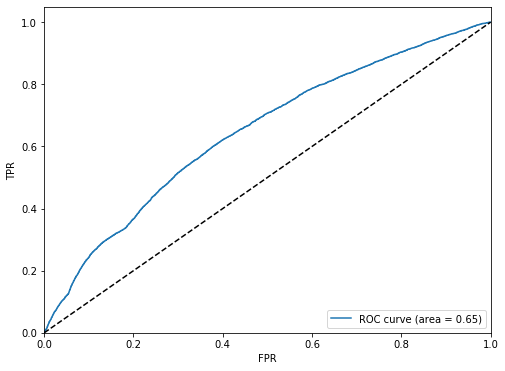

(array([0.00000000e+00, 0.00000000e+00, 1.41498755e-05, ...,
        9.99971700e-01, 9.99985850e-01, 1.00000000e+00]),
 array([0.00000000e+00, 1.61134386e-04, 1.61134386e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99933117e+00, 9.99331173e-01, 9.98134796e-01, ...,
        1.60742896e-03, 7.71275535e-04, 2.95204602e-07]))

In [240]:
draw_roc(y_test,GLM_pred)

In [241]:
y_test

273224    0
234105    0
133715    0
158554    0
117488    0
         ..
198366    0
142336    0
129260    0
221729    0
212328    0
Name: TARGET, Length: 76878, dtype: int8

In [242]:
type(y_test)

pandas.core.series.Series

In [243]:
y_test.dtypes

dtype('int8')

In [244]:
type(GLM_pred)

numpy.ndarray

In [245]:
GLM_pred_new.dtypes

dtype('float64')

In [246]:
GLM_pred

array([0.47713277, 0.46356546, 0.38430842, ..., 0.44974633, 0.46744472,
       0.52852018])

In [247]:
GLM_pred_new = pd.Series(GLM_pred)

In [248]:
type(GLM_pred_new)

pandas.core.series.Series

In [249]:
GLM_pred_new.round()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
76873    0.0
76874    0.0
76875    0.0
76876    0.0
76877    1.0
Length: 76878, dtype: float64

In [250]:
from sklearn import metrics
import seaborn as sns
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm, annot=True, fmt='.2f',
              xticklabels=['Bad Credit','Good Credit'],
              yticklabels = ['Bad Credit','Good Credit'],
               cmap = 'Greens_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

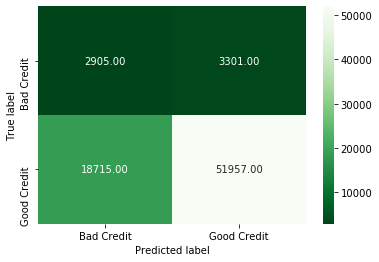

In [251]:
draw_cm(y_test,GLM_pred_new.round())

In [252]:
f1 = f1_score(y_test,GLM_pred_new.round())
f1

0.2087975274922734

In [253]:
precision_score(y_test,GLM_pred_new.round())

0.1343663274745606

In [254]:
recall_score(y_test,GLM_pred_new.round())

0.46809539155655816

In [147]:
test1 = data[data.SK_ID_CURR.isin(test.SK_ID_CURR)]

In [158]:
test1.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER',
       'PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT',
       'PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT',
       'PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT',
       'PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT',
       'PREV_APPL_MEAN_POS_MEAN_MONTHS_BALANCE',
       'PREV_APPL_MEAN_POS_MEAN_CNT_INSTALMENT',
       'PREV_APPL_MEAN_POS_MEAN_CNT_INSTALMENT_FUTURE',
       'PREV_APPL_MEAN_POS_MEAN_SK_DPD', 'PREV_APPL_MEAN_POS_MEAN_SK_DPD_DEF'],
      dtype='object', length=174)

In [159]:
test1.shape

(48744, 174)

In [164]:
test1_new = test1.loc[:,['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_BUR_MEAN_DAYS_CREDIT',
 'PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM',
 'PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT',
 'DAYS_EMPLOYED']]

In [165]:
test1_new[test1_new.isnull()]=0

In [ ]:
#test2 = train_labels.merge(train1, on = 'SK_ID_CURR', how = 'inner')

In [166]:
GLM_pred_test = GLM.predict_proba(test1_new)[:, 1] # use predict_proba to predict probabilities and 
                                            # [:,1] for the 1 probability output (by default it will save both probabilities, 
                                                # for value 0 and value 1)


In [184]:
GLM_pred_test

array([0.47896386, 0.52873099, 0.40134923, ..., 0.49566701, 0.40743101,
       0.59530547])

In [179]:
d=pd.DataFrame(test1['SK_ID_CURR'])

In [185]:
d["TARGET"]=GLM_pred_test

In [195]:
d

,SK_ID_CURR,TARGET
307511,100001,0.478964
307512,100005,0.528731
307513,100013,0.401349
307514,100028,0.329359
307515,100038,0.546639
...,...,...
356250,456221,0.474744
356251,456222,0.538567
356252,456223,0.495667
356253,456224,0.407431


In [183]:
d.to_csv('test_pred.csv')